출력 설정

In [ ]:
import numpy as np
import pandas as pd

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3
# Dataframe의 출력을 소수점 이하 3자리로 제한
pd.set_option('precision', 3)

In [ ]:
# 구글 드라이브 사용 권한 설정
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# 과제 파일 저장한 폴더 위치 설정 (폴더 위치에 맞춰서 변경할 것)
import os
colab_path = "/content/drive/MyDrive/Classroom/Bigdata/3주"  # 경로예시: 구글드라이브/내 드라이브/Colab Notebooks/과제폴더명

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Classroom/Bigdata/3주/ncsoft_data.csv')
# df의 처음 5행을 표시
df.head()

,date,num_search,ceo kim,stock_price
0,2021-03-28,39,4,834000
1,2021-04-04,36,2,885000
2,2021-04-11,31,3,906000
3,2021-04-18,32,2,894000
4,2021-04-25,27,0,861000


### **전제 : 회사 이름에 대한 검색량의 분산이 높을 수록 주식 가격 변화량이 커질것이다**

### **가설 : 회사 이름보다 그 회사의 대표자(ceo)의 검색량의 분산이 주식 가격 변화량 예측에 적합할 것이다**

In [ ]:
df[:12].describe()

,num_search,ceo kim,stock_price
count,12.00,12.000,12.000
mean,30.25,1.667,857416.667
std,3.98,1.155,26565.385
min,26.00,0.000,820000.000
25%,27.00,1.000,844500.000
50%,29.50,1.000,855000.000
75%,31.25,2.250,867000.000
max,39.00,4.000,906000.000


In [ ]:
df[12:24].describe()

,num_search,ceo kim,stock_price
count,12.00,12.000,12.000
mean,32.00,3.583,773583.333
std,5.17,3.118,79428.022
min,24.00,1.000,611000.000
25%,28.50,2.000,760750.000
50%,32.50,2.000,809000.000
75%,35.50,5.000,821250.000
max,40.00,12.000,853000.000


In [ ]:
df[24:36].describe()

,num_search,ceo kim,stock_price
count,12.000,12.000,12.000
mean,48.417,4.083,637000.000
std,23.781,4.078,77706.909
min,30.000,1.000,560000.000
25%,31.000,1.000,579250.000
50%,33.000,2.000,607000.000
75%,63.250,5.500,692500.000
max,100.000,14.000,786000.000


In [ ]:
df[36:].describe()

,num_search,ceo kim,stock_price
count,15.000,15.000,15.000
mean,36.467,2.067,566033.333
std,6.105,3.615,85821.964
min,26.000,0.000,452000.000
25%,33.000,1.000,501250.000
50%,35.000,1.000,565000.000
75%,39.000,1.500,624500.000
max,48.000,15.000,737000.000


In [ ]:
nc1_std = df[:12].std()
nc2_std = df[12:24].std()
nc3_std = df[24:36].std()
nc4_std = df[36:].std()


df_std = pd.concat([nc1_std,nc2_std,nc3_std,nc4_std],axis=1)
df_std.columns = ['1분기','2분기','3분기','4분기']
df_std.loc['stock_price'] = df_std.loc['stock_price'] / 10000
df_std
num_search = df_std.loc['num_search']
ceo_kim = df_std.loc['ceo kim']
stock_price = df_std.loc['stock_price']
#num_search

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-p

In [ ]:
# Matplotlib의 pyplot 모듈을 plt라는 이름으로 임포트
import matplotlib.pyplot as plt

# 그래프가 notebook 위에 표시
%matplotlib inline

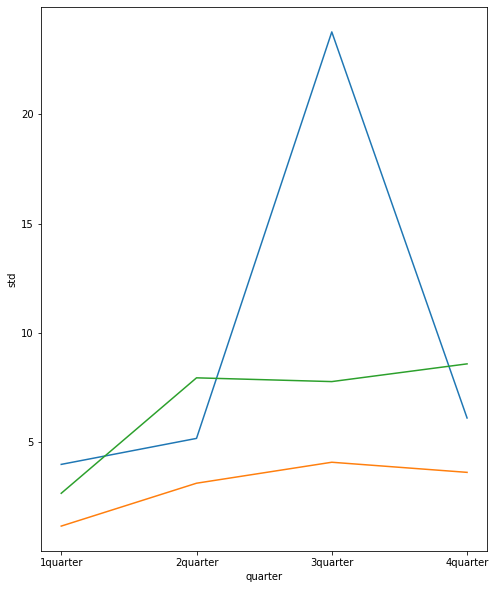

In [ ]:
# 캔버스를 생성
# figsize로 가로・세로 크기를 지정
fig = plt.figure(figsize=(8, 10))
# 켄버스 위에 그래프를 그리기 위한 영역을 지정
# 인수는 영역을 1×1개 지정、하나의 영역에 그린다는 것을 의미
ax = fig.add_subplot(111)

x_values = ['1quarter','2quarter','3quarter','4quarter']

# X축에 레이블 부여
ax.set_xlabel('quarter')
# Y축에 레이블 부여
ax.set_ylabel('std')
plt.plot(x_values,num_search)
plt.plot(x_values,ceo_kim)
plt.plot(x_values,stock_price)
plt.show()

# **결론 : 그래프의 기울기가 ceo의 검색량의 분산이 더 유사하므로 검색량으로 주가를 예측하기에 ceo의 이름이 더 적합하다**